# Learn Keras for Deep Neural Networks
## Chapter 4 - Deep Neural Networks for Supervised Learning - Classification

In [4]:
#Import the necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from keras import Sequential
%matplotlib inline


### Import the dataset into Memory
* The datasets are available to downnload from the Kaggle Competition  - https://www.kaggle.com/c/predicting-red-hat-business-value  
* You must register with Kaggle and accept the rules of the competition before downloading the data.


In [ ]:
#Import the 2 datasets provided in the Zip Folder
df = pd.read_csv("/Users/jmoolay/Personal/Apress/Learn Keras for DNN/Chapter 4/Data/act_train.csv")
people = pd.read_csv("/Users/jmoolay/Personal/Apress/Learn Keras for DNN/Chapter 4/Data/people.csv")

### Data Exploration

In [36]:
#Explore the shape of the datasets
print("Shape of DF:",df.shape)
print("Shape of People DF:",people.shape)


Shape of DF: (2197291, 6)
Shape of People DF: (189118, 41)


In [4]:
#Explore the contents of the first dataset
df.head()


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [5]:
#Calculating the % of Null values in each column for activity data
df.isnull().sum()/df.shape[0]


people_id            0.000000
activity_id          0.000000
date                 0.000000
activity_category    0.000000
char_1               0.928268
char_2               0.928268
char_3               0.928268
char_4               0.928268
char_5               0.928268
char_6               0.928268
char_7               0.928268
char_8               0.928268
char_9               0.928268
char_10              0.071732
outcome              0.000000
dtype: float64

In [6]:
#Explore the contents of People dataset
people.head()


,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [7]:
#Calculate the % of null values in for the entire dataset
people.isnull().sum().sum()


0

In [8]:
#Create the list of columns to drop from activity data
columns_to_remove = ["char_"+str(x) for x in  np.arange(1,10)]
print("Columns to remove:",columns_to_remove)

#Remove the columns from the activity data
df = df[list(set(df.columns) - set(columns_to_remove))]

#Rename the 2 columns to avoid name clashes in merged data
df = df.rename(columns={"date":"activity_date","char_10":"activity_type"})

#Replace nulls in the activity_type column with the mode
df["activity_type"] = df["activity_type"].fillna(df["activity_type"].mode()[0])

#Print the shape of the final activity dataset
print("Shape of DF:",df.shape)



Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']
Shape of DF: (2197291, 6)


In [9]:
#Merge the 2 datasets on 'people_id' key
df_new = df.merge(people,on=["people_id"],how="inner")
print("Shape before merging:",df.shape)
print("Shape after merging :",df_new.shape)


Shape before merging: (2197291, 6)
Shape after merging : (2197291, 46)


In [10]:
print("Unique values for outcome:",df_new["outcome"].unique())
print("\nPercentage of distribution for outcome-")
print(df_new["outcome"].value_counts()/df_new.shape[0])


Unique values for outcome: [0 1]

Percentage of distribution for outcome-
0    0.556046
1    0.443954
Name: outcome, dtype: float64


### Data Engineering

In [11]:

#Checking the distinct datatypes in the dataset
print("Distinct DataTypes:",list(df_new.dtypes.unique()))


Distinct DataTypes: [dtype('O'), dtype('int64'), dtype('bool')]


In [12]:
#Create a temp dataset with the datatype of columns
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]
#Create a list with names of all Boolean columns
boolean_columns = temp.index[temp["DataType"] == 'bool'].values

print("Boolean columns - \n",boolean_columns)

#Convert all boolean columns to Binary numeric values
for column in boolean_columns:
    df_new[column] = np.where(df_new[column] == True,1,0)

print("\nDistinct DataTypes after processing:",df.dtypes.unique())


Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']

Distinct DataTypes after processing: [dtype('O') dtype('int64')]


In [13]:
#Extracting the object columns from the above dataframe
categorical_columns = temp.index[temp["DataType"] == 'O'].values

#Check the number of distinct values in each categorical column
for column in categorical_columns:
    print(column+" column has :",str(len(df_new[column].unique()))+" distinct values")


activity_date column has : 411 distinct values
people_id column has : 151295 distinct values
activity_id column has : 2197291 distinct values
activity_category column has : 7 distinct values
activity_type column has : 6515 distinct values
char_1 column has : 2 distinct values
group_1 column has : 29899 distinct values
char_2 column has : 3 distinct values
date column has : 1196 distinct values
char_3 column has : 43 distinct values
char_4 column has : 25 distinct values
char_5 column has : 9 distinct values
char_6 column has : 7 distinct values
char_7 column has : 25 distinct values
char_8 column has : 8 distinct values
char_9 column has : 9 distinct values


In [14]:
#Create date related features for 'date' in customer data
df_new["date"] = pd.to_datetime(df_new["date"])

df_new["Year"] = df_new["date"].dt.year
df_new["Month"] = df_new["date"].dt.month
df_new["Quarter"] = df_new["date"].dt.quarter
df_new["Week"] = df_new["date"].dt.week
df_new["WeekDay"] = df_new["date"].dt.weekday
df_new["Day"] = df_new["date"].dt.day

#Create date related features for 'date' in activity data
df_new["activity_date"] = pd.to_datetime(df_new["activity_date"])

df_new["Activity_Year"] = df_new["activity_date"].dt.year
df_new["Activity_Month"] = df_new["activity_date"].dt.month
df_new["Activity_Quarter"] = df_new["activity_date"].dt.quarter
df_new["Activity_Week"] = df_new["activity_date"].dt.week
df_new["Activity_WeekDay"] = df_new["activity_date"].dt.weekday
df_new["Activity_Day"] = df_new["activity_date"].dt.day

#Delete the original date columns
del(df_new["date"])
del(df_new["activity_date"])

print("Shape of data after create Date Features:",df_new.shape)


Shape of data after create Date Features: (2197291, 56)


In [15]:
print(df_new[["people_id","activity_type","activity_id","group_1"]].head())

  people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304


In [16]:
#For people ID, we would need to extract values after '_'
df_new.people_id = df_new.people_id.apply(lambda x:x.split("_")[1])
df_new.people_id = pd.to_numeric(df_new.people_id)

#For activity ID also, we would need to extract values after '_'
df_new.activity_id = df_new.activity_id.apply(lambda x:x.split("_")[1])
df_new.activity_id = pd.to_numeric(df_new.activity_id)

#For group_1 , we would need to extract values after ' '
df_new.group_1 = df_new.group_1.apply(lambda x:x.split(" ")[1])
df_new.group_1 = pd.to_numeric(df_new.group_1)

#For activity_type , we would need to extract values after ' '
df_new.activity_type = df_new.activity_type.apply(lambda x:x.split(" ")[1])
df_new.activity_type = pd.to_numeric(df_new.activity_type)

#Double check the new values in the dataframe
print(df_new[["people_id","activity_type","activity_id","group_1"]].head())



   people_id  activity_type  activity_id  group_1
0      100.0             76    1734928.0    17304
1      100.0              1    2434093.0    17304
2      100.0              1    3404049.0    17304
3      100.0              1    3651215.0    17304
4      100.0              1    4109017.0    17304


In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Creating a temporary dataframe that hosts column datatypes
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]

#Create lists to separate numeric, categorical and target features
target = ["outcome"]
numeric_columns = list(set(temp.index[(temp.DataType =="float64") | (temp.DataType =="int64")].values) - set(target))
categorical_columns = temp.index[temp.DataType == "O"].values

print("\nTarget column :\n",target)
print("\nNumeric columns :\n",numeric_columns)
print("\nCategorical columns :\n",categorical_columns)

#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

#Since the above function coverts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

print("\nShape of final df after onehot encoding:",temp.shape)




Target column :
 ['outcome']

Numeric columns :
 ['Activity_Day', 'char_16', 'people_id', 'char_17', 'char_14', 'char_29', 'activity_type', 'Month', 'char_28', 'char_11', 'char_34', 'char_15', 'Activity_WeekDay', 'char_22', 'char_21', 'char_20', 'char_12', 'WeekDay', 'char_37', 'Day', 'Activity_Year', 'char_36', 'activity_id', 'group_1', 'char_33', 'char_38', 'char_19', 'Activity_Month', 'Quarter', 'char_27', 'char_31', 'Year', 'char_18', 'char_23', 'char_32', 'char_26', 'char_35', 'char_30', 'Activity_Week', 'char_25', 'char_10', 'Week', 'char_24', 'Activity_Quarter', 'char_13']

Categorical columns :
 ['activity_category' 'char_1' 'char_2' 'char_3' 'char_4' 'char_5' 'char_6'
 'char_7' 'char_8' 'char_9']

Shape of final df after onehot encoding: (2197291, 183)


In [20]:
from sklearn.model_selection import train_test_split

#split the final dataset into train and test with 80:20
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target], 
test_size=0.2,random_state=2018)
#split the train dataset further into train and validation with 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
test_size=0.1,
random_state=2018)

#Check the shape of each new dataset created
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)



Shape of x_train: (1582048, 183)
Shape of x_test: (439459, 183)
Shape of x_val: (175784, 183)
Shape of y_train: (1582048, 1)
Shape of y_test: (439459, 1)
Shape of y_val: (175784, 1)


### Designing baseline accuracy

In [21]:
#Checking the distribution of values in the target
df_new["outcome"].value_counts()/df_new.shape[0]


0    0.556046
1    0.443954
Name: outcome, dtype: float64

### Designing a Deep Neural Network

In [22]:
from keras import Sequential
from keras.layers import Dense

#Design the deep neural network [Small + 1 layer]
model  = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #activation = sigmoid for binary classification

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)


Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 71s 45us/step - loss: 7.8509 - acc: 0.5105 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 2/3
1582048/1582048 [==============================] - 72s 46us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 3/3
1582048/1582048 [==============================] - 64s 41us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545


In [23]:
#Design the deep neural network [Small + 2 layers]
model  = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)


Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 68s 43us/step - loss: 8.8665 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 2/3
1582048/1582048 [==============================] - 71s 45us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 3/3
1582048/1582048 [==============================] - 67s 42us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455


In [24]:
#Design the deep neural network [Medium + 1 layers]
model  = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)



Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 62s 39us/step - loss: 7.1537 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545: 0s - loss: 7.1536 - acc: 0.
Epoch 2/3
1582048/1582048 [==============================] - 62s 39us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545 0s - loss: 7.1529 - acc: 0
Epoch 3/3
1582048/1582048 [==============================] - 66s 41us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545


In [25]:
#Design the deep neural network [Medium + 2 layers]
model  = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=3, batch_size=64)


Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 111s 70us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 2/3
1582048/1582048 [==============================] - 110s 69us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545- l
Epoch 3/3
1582048/1582048 [==============================] - 125s 79us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545


### Revisiting the training data

In [26]:
#Create a dummy input
dummy_input = np.arange(1,10)
print("Dummy Input = ",dummy_input)

from sklearn.preprocessing  import StandardScaler

#Create a standardscaler instance and fit the data
scaler = StandardScaler()
output = scaler.fit_transform(dummy_input.reshape(-1,1))

print("Output =\n ",list(output))
print("Output's Mean = ",output.mean())
print("Output's Std Dev = ",output.std())
print("\nAfter Inverse Transforming = \n",list(scaler.inverse_transform(output)))



Dummy Input =  [1 2 3 4 5 6 7 8 9]
Output =
  [array([-1.54919334]), array([-1.161895]), array([-0.77459667]), array([-0.38729833]), array([0.]), array([0.38729833]), array([0.77459667]), array([1.161895]), array([1.54919334])]
Output's Mean =  0.0
Output's Std Dev =  1.0

After Inverse Transforming = 
 [array([1.]), array([2.]), array([3.]), array([4.]), array([5.]), array([6.]), array([7.]), array([8.]), array([9.])]


/Users/jmoolay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jmoolay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)



### Deep Neural Networks for Classification with improved data
Let us now, start with a medium sized network to see if we get improved results. We would start with just 3 epochs.


In [28]:

from keras import Sequential
from keras.layers import Dense
model  = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train_scaled,y_train, 
validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)



Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 54s 34us/step - loss: 0.2308 - acc: 0.9000 - val_loss: 0.1912 - val_acc: 0.9213
Epoch 2/3
1582048/1582048 [==============================] - 54s 34us/step - loss: 0.1715 - acc: 0.9316 - val_loss: 0.1595 - val_acc: 0.9380
Epoch 3/3
1582048/1582048 [==============================] - 56s 35us/step - loss: 0.1487 - acc: 0.9442 - val_loss: 0.1475 - val_acc: 0.9453


In [29]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


439459/439459 [==============================] - 8s 19us/step
Metric  loss : 0.15
Metric  acc : 0.95


In [30]:
#Designing the Deep Neural Network [Medium – 2 Layers]
model  = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)


Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 110s 70us/step - loss: 0.1950 - acc: 0.9147 - val_loss: 0.1369 - val_acc: 0.9433
Epoch 2/3
1582048/1582048 [==============================] - 119s 75us/step - loss: 0.1168 - acc: 0.9531 - val_loss: 0.1087 - val_acc: 0.9573
Epoch 3/3
1582048/1582048 [==============================] - 113s 72us/step - loss: 0.0911 - acc: 0.9644 - val_loss: 0.0911 - val_acc: 0.9648


In [31]:
#Designing the network Deep Neural Network – [Large + 2 Layers]
model  = Sequential()
model.add(Dense(1024,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(1024,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train_scaled,y_train, 
validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)


Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 456s 288us/step - loss: 0.1972 - acc: 0.9131 - val_loss: 0.1398 - val_acc: 0.9406
Epoch 2/3
1582048/1582048 [==============================] - 437s 276us/step - loss: 0.1177 - acc: 0.9520 - val_loss: 0.1115 - val_acc: 0.9558
Epoch 3/3
1582048/1582048 [==============================] - 793s 501us/step - loss: 0.0917 - acc: 0.9641 - val_loss: 0.0893 - val_acc: 0.9658


In [32]:
#Designing the network Deep Neural Network – [Medium + 2 Layers]
model  = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dense(512,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])

model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=15, batch_size=64)



Train on 1582048 samples, validate on 175784 samples
Epoch 1/15
1582048/1582048 [==============================] - 1585s 1ms/step - loss: 0.1954 - acc: 0.9141 - val_loss: 0.1379 - val_acc: 0.9435
Epoch 2/15
1582048/1582048 [==============================] - 124s 79us/step - loss: 0.1172 - acc: 0.9528 - val_loss: 0.1077 - val_acc: 0.9583
Epoch 3/15
1582048/1582048 [==============================] - 115s 73us/step - loss: 0.0911 - acc: 0.9645 - val_loss: 0.0884 - val_acc: 0.9663
Epoch 4/15
1582048/1582048 [==============================] - 115s 73us/step - loss: 0.0763 - acc: 0.9706 - val_loss: 0.0774 - val_acc: 0.9711
Epoch 5/15
1582048/1582048 [==============================] - 113s 72us/step - loss: 0.0665 - acc: 0.9750 - val_loss: 0.0701 - val_acc: 0.9747loss: 0.0666 - acc: 0. - ETA: 5 - ETA: 0s - loss: 0.0665 - acc: 0.97
Epoch 6/15
1582048/1582048 [==============================] - 129s 81us/step - loss: 0.0595 - acc: 0.9776 - val_loss: 0.0675 - val_acc: 0.9757
Epoch 7/15
1582048/15

In [33]:
result = model.evaluate(x_test_scaled,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


439459/439459 [==============================] - 15s 34us/step
Metric  loss : 0.06
Metric  acc : 0.98


### Plotting the final results

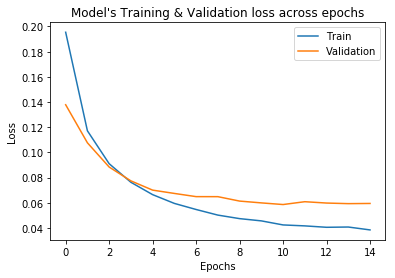

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



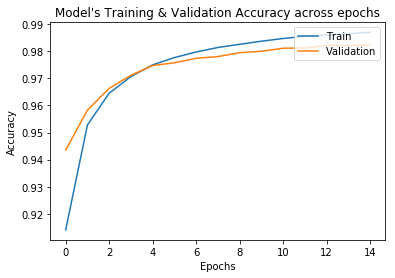

In [35]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
